<img src="https://github.com/amandalemette/images/blob/e011da7260c032bae5c49e56a14ad97c13b8c679/BiMaster/bimaster.png?raw=true"  width=1000 height=80 />

# Professora

 - Amanda Lemette 
	 - prof.amanda@ica.ele.puc-rio.br
	 - [Linkedin](https://www.linkedin.com/in/amanda-lemette-brand%C3%A3o-83280918b)
  - [Youtube](https://www.youtube.com/c/AmandaLemette/featured)

# Talk 2

As bases de dados
- student-mat
- student-por

foram obtidas por uma pesquisa sobre os alunos que faziam as disciplinas de matemática e português do ensino médio. Essa base contém informação social, de gênero e de estudo sobre os alunos. 

Essa base de dados foi extraída do [Kaggle](https://www.kaggle.com/uciml/student-alcohol-consumption).

Conteúdo:


Os atributos para ambas as bases são: 

- school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
- sex - student's sex (binary: 'F' - female or 'M' - male)
- age - student's age (numeric: from 15 to 22)
- address - student's home address type (binary: 'U' - urban or 'R' - rural)
- famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
- Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
- Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
guardian - student's guardian (nominal: 'mother', 'father' or 'other')
- traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
- studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- failures - number of past class failures (numeric: n if 1<=n<3, else 4)
- schoolsup - extra educational support (binary: yes or no)
- famsup - family educational support (binary: yes or no)
paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- activities - extra-curricular activities (binary: yes or no)
- nursery - attended nursery school (binary: yes or no)
- higher - wants to take higher education (binary: yes or no)
- internet - Internet access at home (binary: yes or no)
- romantic - with a romantic relationship (binary: yes or no)
- famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- freetime - free time after school (numeric: from 1 - very - low to 5 - very high)
- goout - going out with friends (numeric: from 1 - very low to 5 - very high)
- Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- health - current health status (numeric: from 1 - very bad to 5 - very good)
- absences - number of school absences (numeric: from 0 to 93)

As notas são relacionadas aos cursos:

- G1 - first period grade (numeric: from 0 to 20)
- G2 - second period grade (numeric: from 0 to 20)
- G3 - final grade (numeric: from 0 to 20, output target)

informação adicional: existem alunos que frequentam ambas as classes e eles podem ser identificados procurando atributos idênticos. 


In [1]:
import pandas as pd

## 1. Carregue no Colab notebook e leia os 2 arquivos csv (student-por e student-mat) e crie um único DataFrame com  eles.

In [2]:
dfm = pd.read_csv('/content/student-mat.csv')

In [ ]:
dfm.head(10)

In [4]:
dfm['class'] = 'math'

In [7]:
dfp = pd.read_csv('/content/student-por.csv')

In [ ]:
dfp.sample(3)

In [9]:
dfp['class'] = 'portuguese'

In [ ]:
dfp.head(2)

In [11]:
df = pd.concat([dfm,dfp],ignore_index = True)

In [12]:
dfm.shape,dfp.shape,df.shape

((395, 34), (649, 34), (1044, 34))

In [13]:
395+649

1044

In [ ]:
df

## 2. Identifique se existem dados faltantes no DataFrame.

In [ ]:
df.info()

In [ ]:
df.isna().sum()

## 3. Quantos alunos cursam a disciplina de matemática e quantos cursam português? Faça um gráfico de pizza representando esses dois grupos. 

In [18]:
df['class'].value_counts()

portuguese    649
math          395
Name: class, dtype: int64

- modo alternativo:

In [21]:
df[df['class']=='portuguese'].shape[0]

649

In [22]:
df[df['class']=='math'].shape[0]

395

In [23]:
import matplotlib.pyplot as plt

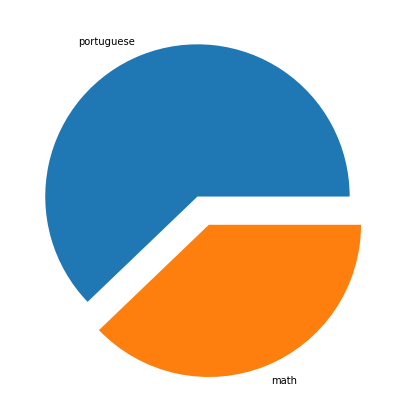

In [26]:
# Creating dataset
classe = df['class'].value_counts().index
data = df['class'].value_counts()
 
# Creating plot
fig = plt.figure(figsize =(10, 7))
explode = (0, 0.2)
plt.pie(data, labels = classe,explode = explode)
 
# show plot
plt.show()

## 4. Agrupe df de acordo com o tipo de classe 

- categoria: Class e sex
- colunas a serem agrupadas: age, studytime, traveltime
- função de agregação (em ordem): média

In [31]:
df.groupby(['class','sex']).count()['school']

class       sex
math        F      208
            M      187
portuguese  F      383
            M      266
Name: school, dtype: int64

In [33]:
DF = df.groupby(['class','sex']).count()['school'].reset_index()
DF

,class,sex,school
0,math,F,208
1,math,M,187
2,portuguese,F,383
3,portuguese,M,266


In [42]:
df.groupby(['class','sex']).agg({'age':'mean','studytime':'mean','traveltime':'mean'})

age  studytime  traveltime
class      sex                                  
math       F    16.730769   2.278846    1.408654
           M    16.657754   1.764706    1.491979
portuguese F    16.788512   2.073107    1.543081
           M    16.680451   1.725564    1.605263

## 5. Os alunos que obtiveram maiores notas ((G1+G2+G3)/3) foram os que tiveram menos tempo livre em ambas as turmas?

In [43]:
df['FG'] = (df['G1']+df['G2']+df['G3'])/3

In [44]:
df.head(1)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,class,FG
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,math,5.666667


In [45]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,FG
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954,11.267241
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796,3.218805
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.333333
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000,9.333333
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000,11.333333
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000,13.333333
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,19.333333


In [47]:
df[['freetime','FG']].corr() #pearson

,freetime,FG
freetime,1.000000,-0.065489
FG,-0.065489,1.000000


In [48]:
df[['freetime','FG']].corr('spearman')

,freetime,FG
freetime,1.000000,-0.075516
FG,-0.075516,1.000000


In [ ]:
df.corr('spearman')

## 5. Os alunos que tiraram as maiores notas em ambas as turmas foram homens ou mulheres?

In [50]:
df.groupby(['class','sex']).agg({'FG':'max'})

FG
class      sex           
math       F    18.666667
           M    19.333333
portuguese F    18.666667
           M    18.000000

In [51]:
df.groupby(['class','sex'])['FG'].max()

class       sex
math        F      18.666667
            M      19.333333
portuguese  F      18.666667
            M      18.000000
Name: FG, dtype: float64

## 6. O aluno (F ou M) que obteve a nota mais baixa veio de qual escola (GP ou MS)? 

In [52]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'class', 'FG'],
      dtype='object')

In [53]:
df['school'].unique()

array(['GP', 'MS'], dtype=object)

In [58]:
df.groupby(['school']).agg({'FG':['max','min']})

FG          
              max       min
school                     
GP      19.333333  1.333333
MS      18.666667  1.333333

## 7. Faça um diagrama de caixa com essa base de dados. 

In [59]:
df.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,class,FG
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,math,5.666667
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,math,5.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,math,8.333333


In [60]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'class', 'FG'],
      dtype='object')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      1044 non-null   object 
 1   sex         1044 non-null   object 
 2   age         1044 non-null   int64  
 3   address     1044 non-null   object 
 4   famsize     1044 non-null   object 
 5   Pstatus     1044 non-null   object 
 6   Medu        1044 non-null   int64  
 7   Fedu        1044 non-null   int64  
 8   Mjob        1044 non-null   object 
 9   Fjob        1044 non-null   object 
 10  reason      1044 non-null   object 
 11  guardian    1044 non-null   object 
 12  traveltime  1044 non-null   int64  
 13  studytime   1044 non-null   int64  
 14  failures    1044 non-null   int64  
 15  schoolsup   1044 non-null   object 
 16  famsup      1044 non-null   object 
 17  paid        1044 non-null   object 
 18  activities  1044 non-null   object 
 19  nursery     1044 non-null  

In [62]:
df['Mjob'].unique()

array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object)

In [63]:
import seaborn as sns

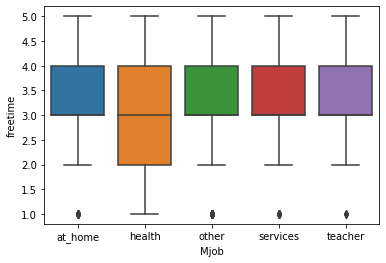

In [64]:
sns.boxplot(x='Mjob',y='freetime',data = df)
plt.show()

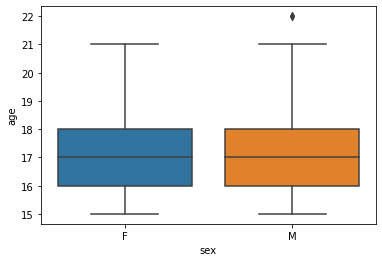

In [65]:
sns.boxplot(x='sex',y='age',data = df)
plt.show()

In [ ]:
sns.swarmplot(x='Mjob',y='freetime',data = df)
plt.show()